In [1]:
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import medical_lib as ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

Version 2: Balanciertes Training aber unbalanciertes Predicten

Einlesen der Trainingsdaten

In [2]:
traindata = pd.read_csv('naive_latest_todesinterval_model3_Train_langlebig.csv') 
traindata = traindata.iloc[:, 3:] 
traindata = traindata.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffle Rows and Reset Index
train_features = traindata.iloc[:, :-1]
train_class = traindata.iloc[:, -1]

testdata = pd.read_csv('naive_latest_todesinterval_model3_Test_langlebig.csv') 
testdata = testdata.iloc[:, 3:] 
testdata = testdata.sample(frac=1, random_state=42).reset_index(drop=True)

test_features = testdata.iloc[:, :-1]
test_class = testdata.iloc[:, -1]
test_class_array = np.array(test_class)

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [3]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(train_features,train_class)
knnYpred = medKNN.predict(test_features)
accuracyKNN = accuracy_score(test_class, knnYpred)
precisionKNN = precision_score(test_class, knnYpred, average='weighted')
recallKNN = recall_score(test_class, knnYpred, average='weighted')
f1scoreKNN = f1_score(test_class, knnYpred, average='weighted')
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - test_class_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'KNN_precision'] = precisionknn
# result.at[index, 'KNN_recall'] = recallknn
# result.at[index, 'KNN_f1'] = f1scoreknn
# result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.6953405017921147 KNN Precision:  0.8900000082795781 KNN Recall:  0.6953405017921147 KNN F1-Score:  0.7744503862150921
Tatsächlich:  0.7419354838709677 0.21428571428571427 0.75 0.3333333333333333
Durchschnittliche Abweichung:  0.8422939068100358
Standartabweichung der Abweichung:  1.3744479920296782


Logistic Regression

In [4]:
lr_model = LogisticRegression()
lr_model.fit(train_features,train_class)
lr_y_pred = lr_model.predict(test_features)
lr_accuracyLogReg = accuracy_score(test_class, lr_y_pred)
lr_precisionLogReg = precision_score(test_class, lr_y_pred, average='weighted')
lr_recallLogReg = recall_score(test_class, lr_y_pred, average='weighted')
lr_f1scoreLogReg = f1_score(test_class, lr_y_pred, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - test_class_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'Logistic_Regression_precision'] = precisionlr
# result.at[index, 'Logistic_Regression_recall'] = recalllr
# result.at[index, 'Logistic_Regression_f1'] = f1scorelr
# result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.7992831541218638 Log-Regression Precision:  0.8963283040034986 Log-Regression Recall:  0.7992831541218638 Log-Regression F1-Score:  0.8348970026389381
Tatsächlich:  0.8422939068100358 0.3275862068965517 0.7916666666666666 0.4634146341463415
Durchschnittliche Abweichung:  0.3978494623655914
Standartabweichung der Abweichung:  0.831371259358181


Decision Tree

In [5]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(train_features,train_class)
decTree_pred = medical_DecTree.predict(test_features)
accuracyDecTree = accuracy_score(test_class, decTree_pred)
precisionDecTree = precision_score(test_class, decTree_pred, average='weighted')
recallDecTree = recall_score(test_class, decTree_pred, average='weighted')
f1scoreDecTree = f1_score(test_class, decTree_pred, average='weighted')
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - test_class_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'Decision_Tree_precision'] = precisiondc
# result.at[index, 'Decision_Tree_recall'] = recalldc
# result.at[index, 'Decision_Tree_f1'] = f1scoredc
# result.to_csv('automated_algorithmen.csv')


medical_DecTree Accuracy:  0.6523297491039427 DecTree Precision:  0.9033637508619687 DecTree Recall:  0.6523297491039427 DecTree F1-Score:  0.7528346331690516
Tatsächlich:  0.7132616487455197 0.21428571428571427 0.875 0.34426229508196726
Durchschnittliche Abweichung:  0.7670250896057348
Standartabweichung der Abweichung:  1.209070603143112


Random Forest

In [6]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(train_features,train_class)
rfPred = medical_RF.predict(test_features)
accuracyRF = accuracy_score(test_class, rfPred)
precisionRF = precision_score(test_class, rfPred, average='weighted')
recallRF = recall_score(test_class, rfPred, average='weighted')
f1scoreRF = f1_score(test_class, rfPred, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - test_class_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'Random_Forest_precision'] = precisionrf
# result.at[index, 'Random_Forest_recall'] = recallrf
# result.at[index, 'Random_Forest_f1'] = f1scorerf
# result.to_csv('automated_algorithmen.csv')


Anzahl Estimator: 100  RF Accuracy:  0.7634408602150538 RF Precision:  0.9142674406524336 RF Recall:  0.7634408602150538 RF F1-Score:  0.8228621881067251
Tatsächlich:  0.8207885304659498 0.3194444444444444 0.9583333333333334 0.4791666666666667
Durchschnittliche Abweichung:  0.5053763440860215
Standartabweichung der Abweichung:  0.9536609999415796


ADABoost

In [7]:
adamodel = AdaBoostClassifier()
adamodel.fit(train_features,train_class)
adamodel_prediction = adamodel.predict(test_features)
adamodel_accuracy = accuracy_score(test_class, adamodel_prediction)
adamodel_precision = precision_score(test_class, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(test_class, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(test_class, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - test_class_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'ADABoost_precision'] = precisionada
# result.at[index, 'ADABoost_recall'] = recallada
# result.at[index, 'ADABoost_f1'] = f1scoreada
# result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.5770609318996416 Precision:  0.9110401413268796 Recall:  0.5770609318996416 f1-Score:  0.6944355954453046
Tatsächlich:  0.6379928315412187 0.18699186991869918 0.9583333333333334 0.3129251700680272
Durchschnittliche Abweichung:  0.7813620071684588
Standartabweichung der Abweichung:  1.032905014312733


XGBoost

In [8]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(train_features,train_class)
xgboosted_prediction = xgmodel.predict(test_features)
xgboosted_accuracy = accuracy_score(test_class, xgboosted_prediction)
xgboosted_precision = precision_score(test_class, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(test_class, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(test_class, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - test_class_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if test_class_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
# index = result.index[result['Modellierung'] == 'Model_5_version_2'].tolist()
# result.at[index, 'XGBoost_precision'] = precisionxg
# result.at[index, 'XGBoost_recall'] = recallxg
# result.at[index, 'XGBoost_f1'] = f1scorexg
# result.to_csv('automated_algorithmen.csv')

XGBOOST:  Accuracy:  0.7562724014336918 Precision:  0.9185910917821237 Recall:  0.7562724014336918 F1-Score:  0.8248298160578862
Tatsächlich:  0.8207885304659498 0.3194444444444444 0.9583333333333334 0.4791666666666667
Durchschnittliche Abweichung:  0.5412186379928315
Standartabweichung der Abweichung:  1.0356996590414844
#################################################################################################


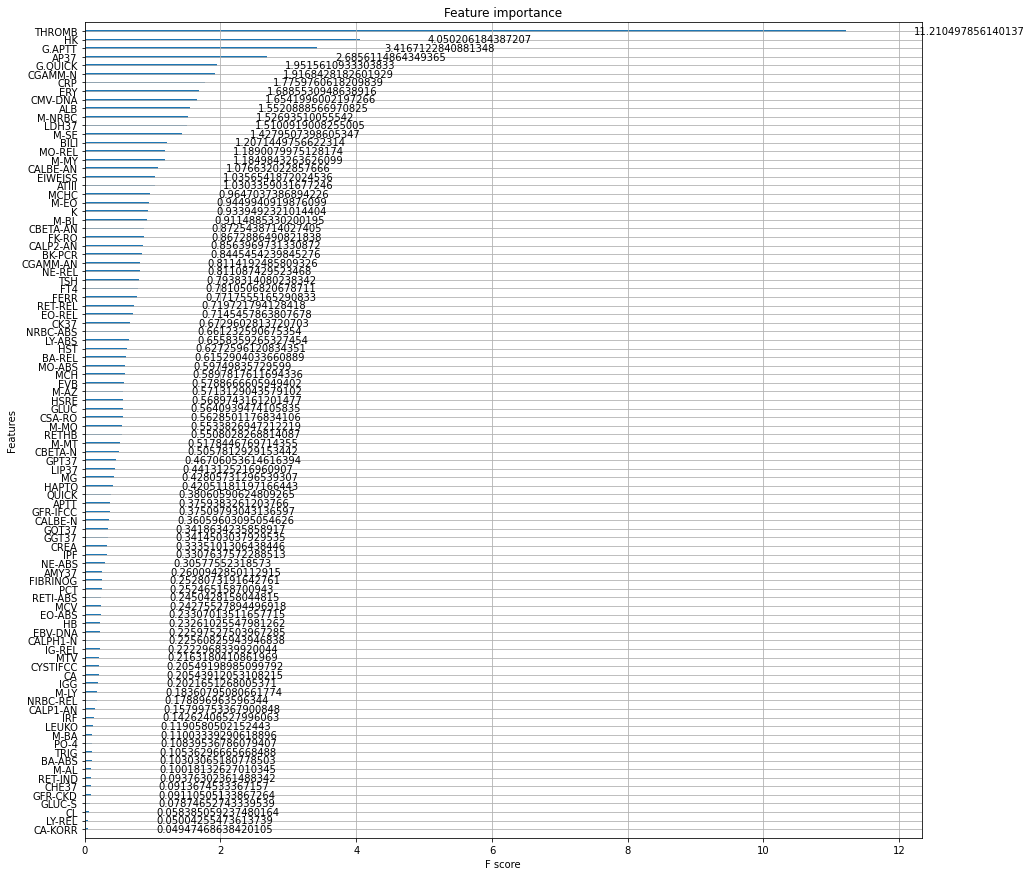

In [9]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type = 'gain').items())
pyplot.rcParams['figure.figsize'] = [15,15]
newfeatures = []
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()